---
title: "Data Download 2"
execute:
  echo: false
  output: false
---

This sample notebook demonstrates how to programatically download and visualize air quality data stored on the [Open Storage Network](https://openstoragenetwork.readthedocs.io/en/latest/index.html). In this second version, we demonstrate the use of the `AWS.jl` and `AWSS3.jl` client libraries

In [1]:
test_parameter = 3.14

3.14

In [2]:
# activate the local julia environment
using Pkg
Pkg.activate(".")

  Activating project at `~/gitrepos/utd/mints-aq-reports/notebooks`


In [3]:
#| echo: true
using CSV, DataFrames 
using Plots
using Markdown
using AWS, AWSS3
include("./osn_anonymous.jl")

Now that we have the requisite packages loaded, let's set up our AWS configuration information using our custom `AnonymousOSN` configuration function. 

In [4]:
|# echo true 
endpoint = "https://ncsa.osn.xsede.org"
bucket = "s3://ees230012-bucket01"

# configure AWS.jl to use our OSN configuration
AWS.global_aws_config(AnonymousOSN(endpoint))

AnonymousOSN("https://ncsa.osn.xsede.org")

We now can use `AWSS3.jl` to explore the files stored on OSN for central node 8.

In [6]:
#| echo: true
#| output: true
p = S3Path(joinpath(bucket, "AirQualityNetwork/data/raw/Central_Hub_1/2023/03/02/"))

df_paths = []

for (root,dirs,files) ∈ walkdir(p)
    for f ∈ files
        push!(df_paths, joinpath(root, f))
    end
end

df_paths

15-element Vector{Any}:
 "s3://ees230012-bucket01/AirQual" ⋯ 56 bytes ⋯ "6318c91_APDS9002_2023_03_02.csv"
 "s3://ees230012-bucket01/AirQual" ⋯ 54 bytes ⋯ "e06318c91_BME280_2023_03_02.csv"
 "s3://ees230012-bucket01/AirQual" ⋯ 54 bytes ⋯ "e06318c91_BME680_2023_03_02.csv"
 "s3://ees230012-bucket01/AirQual" ⋯ 53 bytes ⋯ "1e06318c91_GL001_2023_03_02.csv"
 "s3://ees230012-bucket01/AirQual" ⋯ 54 bytes ⋯ "e06318c91_GUV001_2023_03_02.csv"
 "s3://ees230012-bucket01/AirQual" ⋯ 54 bytes ⋯ "e06318c91_HM3301_2023_03_02.csv"
 "s3://ees230012-bucket01/AirQual" ⋯ 55 bytes ⋯ "06318c91_IPS7100_2023_03_02.csv"
 "s3://ees230012-bucket01/AirQual" ⋯ 50 bytes ⋯ "_001e06318c91_IP_2023_03_02.csv"
 "s3://ees230012-bucket01/AirQual" ⋯ 54 bytes ⋯ "e06318c91_LIBRAD_2023_03_02.csv"
 "s3://ees230012-bucket01/AirQual" ⋯ 53 bytes ⋯ "1e06318c91_SCD30_2023_03_02.csv"
 "s3://ees230012-bucket01/AirQual" ⋯ 54 bytes ⋯ "e06318c91_TB108L_2023_03_02.csv"
 "s3://ees230012-bucket01/AirQual" ⋯ 55 bytes ⋯ "06318c91_TMG3993_2023_03_

We can now load the files directly into dataframes for continued analysis. 

In [8]:
#| echo: true 
#| output: true
df = CSV.File(S3Path(df_paths[7])) |> DataFrame

Row,dateTime,pc0_1,pc0_3,pc0_5,pc1_0,pc2_5,pc5_0,pc10_0,pm0_1,pm0_3,pm0_5,pm1_0,pm2_5,pm5_0,pm10_0
,String31,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2023-03-02 21:18:03.686980,186348,101116,61137,6795,1036,10,0,0.155705,2.4369,8.82213,14.4999,28.0323,29.1087,29.1087
2,2023-03-02 21:18:04.756650,185877,100817,60893,6789,1036,10,0,0.155312,2.42976,8.78947,14.4623,28.0025,29.149,29.149
3,2023-03-02 21:18:05.682043,185455,100555,60617,6783,1040,16,0,0.154959,2.4235,8.75437,14.4225,28.0176,29.7319,29.7319
4,2023-03-02 21:18:06.679952,185011,100310,60232,6760,1041,17,0,0.154589,2.4176,8.70829,14.357,27.959,29.8246,29.8246
5,2023-03-02 21:18:07.677839,184486,99999,59783,6724,1042,17,0,0.154149,2.41013,8.65389,14.2727,27.8843,29.7314,29.7314
6,2023-03-02 21:18:08.674922,184024,99727,59374,6693,1041,18,0,0.153763,2.40361,8.60465,14.1975,27.7991,29.7457,29.7457
7,2023-03-02 21:18:09.672863,183592,99472,58951,6660,1038,19,0,0.153403,2.39749,8.55434,14.1197,27.6844,29.7084,29.7084
8,2023-03-02 21:18:10.670898,183114,99167,58509,6623,1035,16,0,0.153003,2.39022,8.50093,14.0356,27.5565,29.3077,29.3077
9,2023-03-02 21:18:11.667976,182595,98817,58055,6587,1032,10,0,0.152569,2.3819,8.44521,13.9493,27.4383,28.5185,28.5185


In [9]:
using Dates

function date2datetime(dt::AbstractString;  df = dateformat"yyyy-mm-dd HH:MM:SS.sss")
    dt_string = String(dt)
    dt_split = split(dt_string, ".")
    dt_millisecond = join([dt_split[1], dt_split[2][1:end-3]], ".")
    return DateTime(dt_millisecond, df)
end

# convert date time from string to actual datetime object
df.dateTime .= date2datetime.(df.dateTime)

9715-element Vector{DateTime}:
 2023-03-02T21:18:03.686
 2023-03-02T21:18:04.756
 2023-03-02T21:18:05.682
 2023-03-02T21:18:06.679
 2023-03-02T21:18:07.677
 2023-03-02T21:18:08.674
 2023-03-02T21:18:09.672
 2023-03-02T21:18:10.670
 2023-03-02T21:18:11.667
 2023-03-02T21:18:12.666
 2023-03-02T21:18:13.663
 2023-03-02T21:18:14.661
 2023-03-02T21:18:15.658
 ⋮
 2023-03-02T23:59:48.539
 2023-03-02T23:59:49.537
 2023-03-02T23:59:50.535
 2023-03-02T23:59:51.534
 2023-03-02T23:59:52.532
 2023-03-02T23:59:53.530
 2023-03-02T23:59:54.528
 2023-03-02T23:59:55.526
 2023-03-02T23:59:56.524
 2023-03-02T23:59:57.522
 2023-03-02T23:59:58.520
 2023-03-02T23:59:59.518

Now that we have the data loaded we can visualize it: 

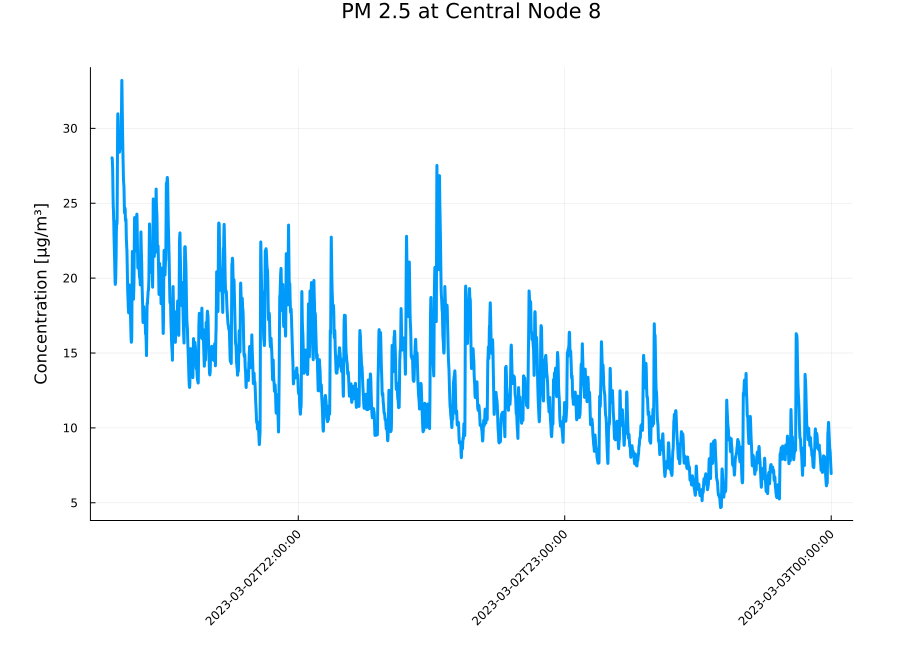

In [10]:
#| output: true
plot(
    df.dateTime,
    df.pm2_5,
    ylabel="Concentration [μg/m³]",
    title="PM 2.5 at Central Node 8",
    lw=3,
    label="",
    xrotation=45,
    margin=10*Plots.mm,
    size=(900,650),
)

In [11]:
#| output: true

md"""
That plot looks great! Let's now demonstrate the use of notebook parameters with papermill. In the first cell we define the variable `test_parameter` to the value `3.14`. At execution time, the value is now **$(test_parameter)**
"""

That plot looks great! Let's now demonstrate the use of notebook parameters with papermill. In the first cell we define the variable `test_parameter` to the value `3.14`. At execution time, the value is now **3.14**
